In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore')

### LOADING THE CSV FILE

In [25]:
#reading the data 
bikesharing= pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### UNDERSTANDING ,CLEANING AND  VISUALISING THE DATA USING EDA 

In [26]:
bikesharing.shape

(730, 16)

In [27]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [28]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [29]:
#Dropping columns not required for the study
bikesharing.drop(['instant','dteday','atemp','casual','registered'],axis=1,inplace=True)
bikesharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [30]:
#Encoding columns
bikesharing.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)

bikesharing.weathersit.replace({1:'Clear',2:'Cloudy',3:'Light rain',4:'Heavy rain'},inplace = True)

bikesharing.mnth.replace({1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',
                  7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'},inplace = True)

bikesharing.weekday.replace({0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'},inplace = True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


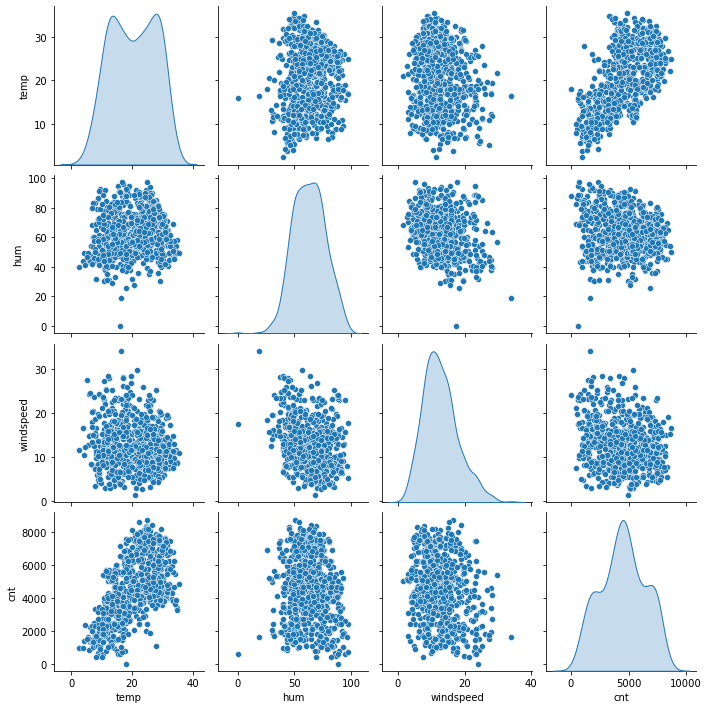

In [31]:
#visualising the numerical variable
variable =bikesharing[['temp','hum','windspeed','cnt']]
sns.pairplot(variable , diag_kind='kde')
plt.show()

It is evident from the graph following linearity.

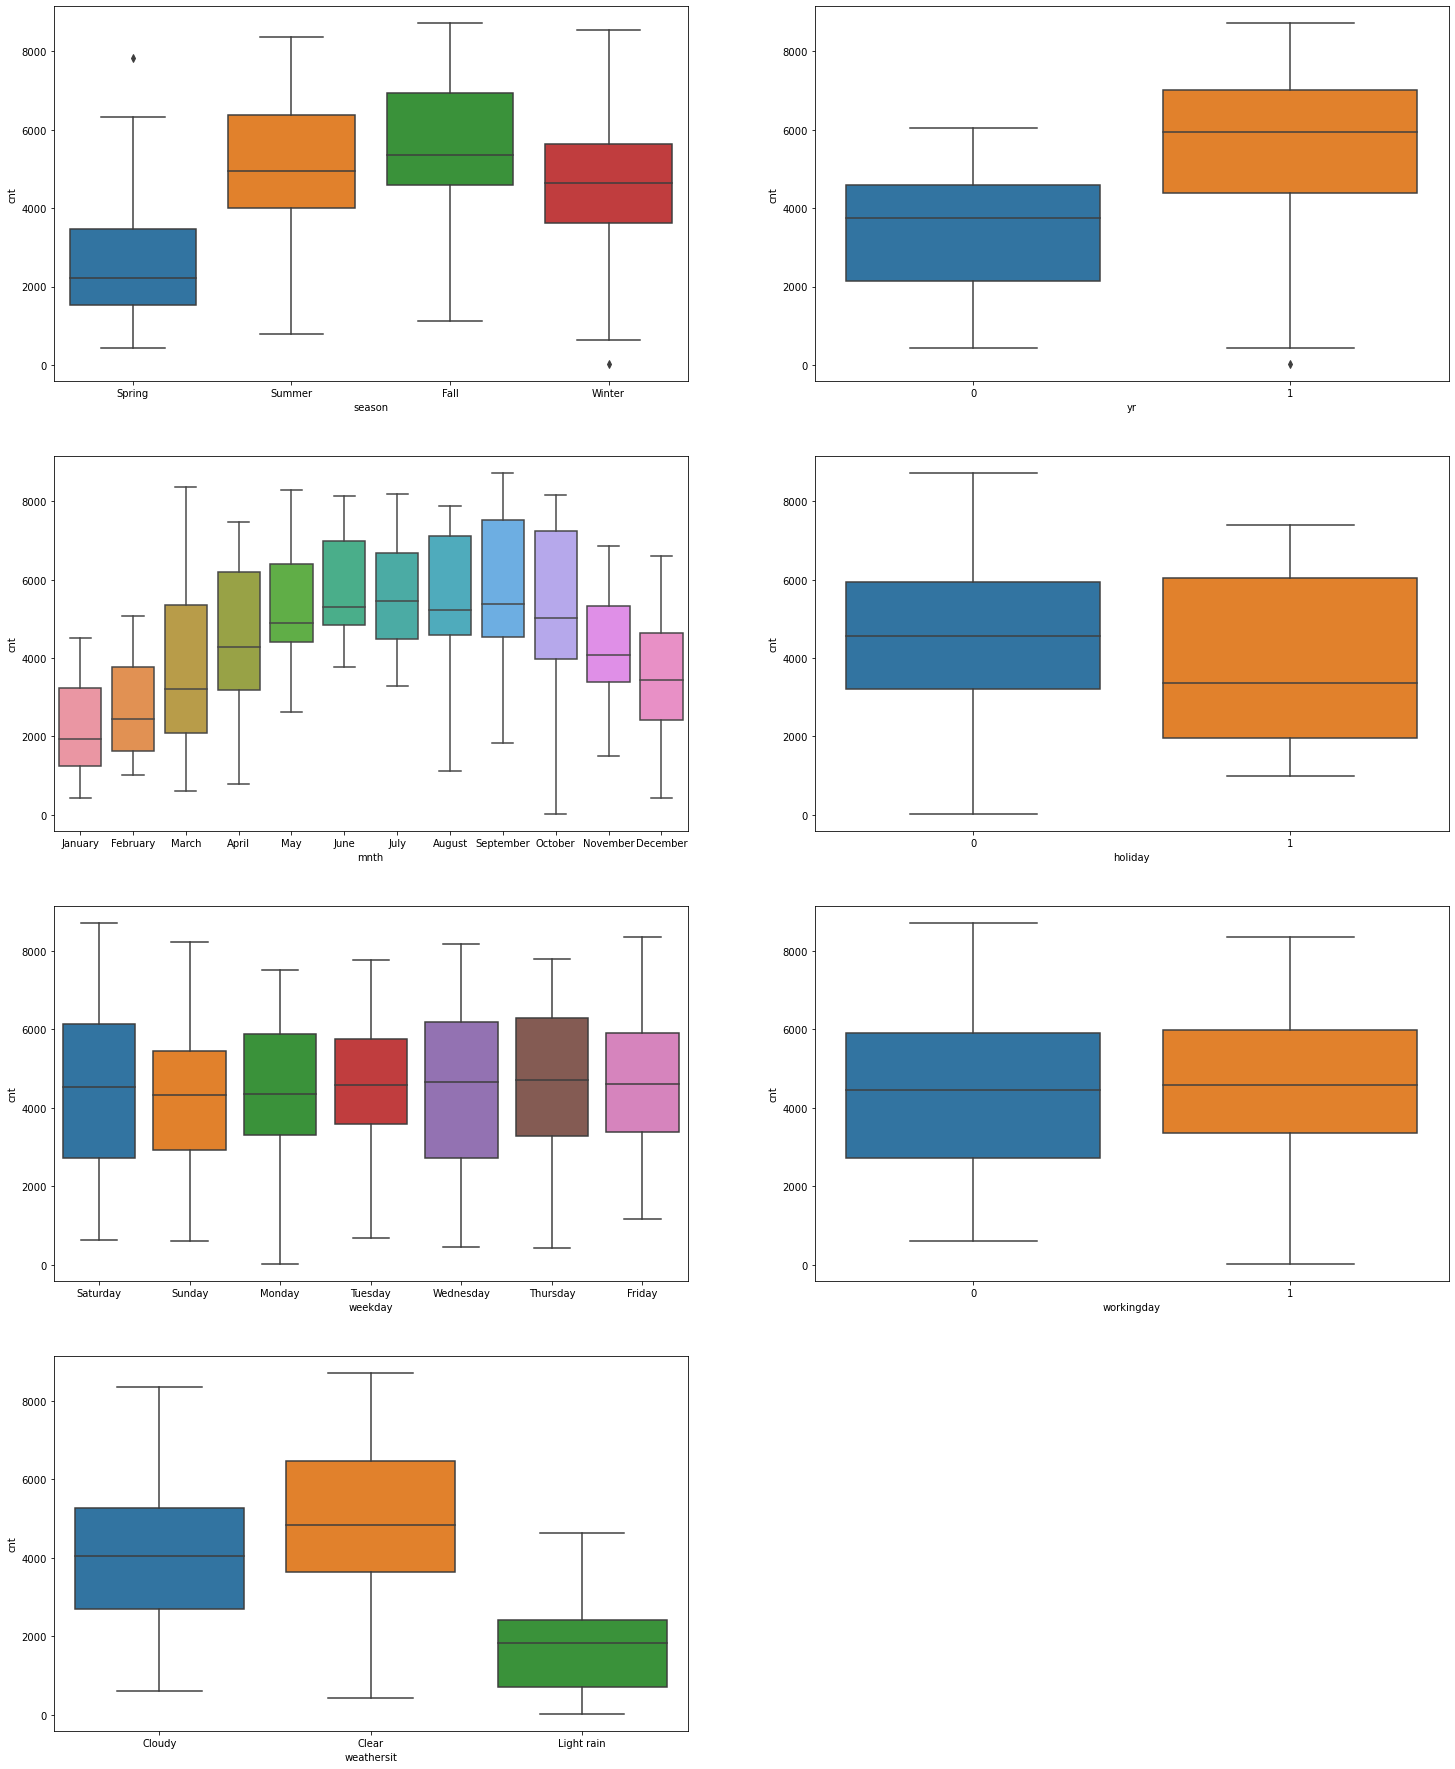

In [32]:
#visualising the categorical variable
plt.figure(figsize= (25 , 40) )
plt.subplot(5,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)

plt.subplot(5,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)

plt.subplot(5,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)

plt.subplot(5,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)

plt.subplot(5,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)

plt.subplot(5,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)

plt.subplot(5,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)

plt.show()

From the box plot it is visible that the number of users increases during : 
1. Fall season compared to other seasons 
2. 2019 more than 2018
3. When it is clear sky

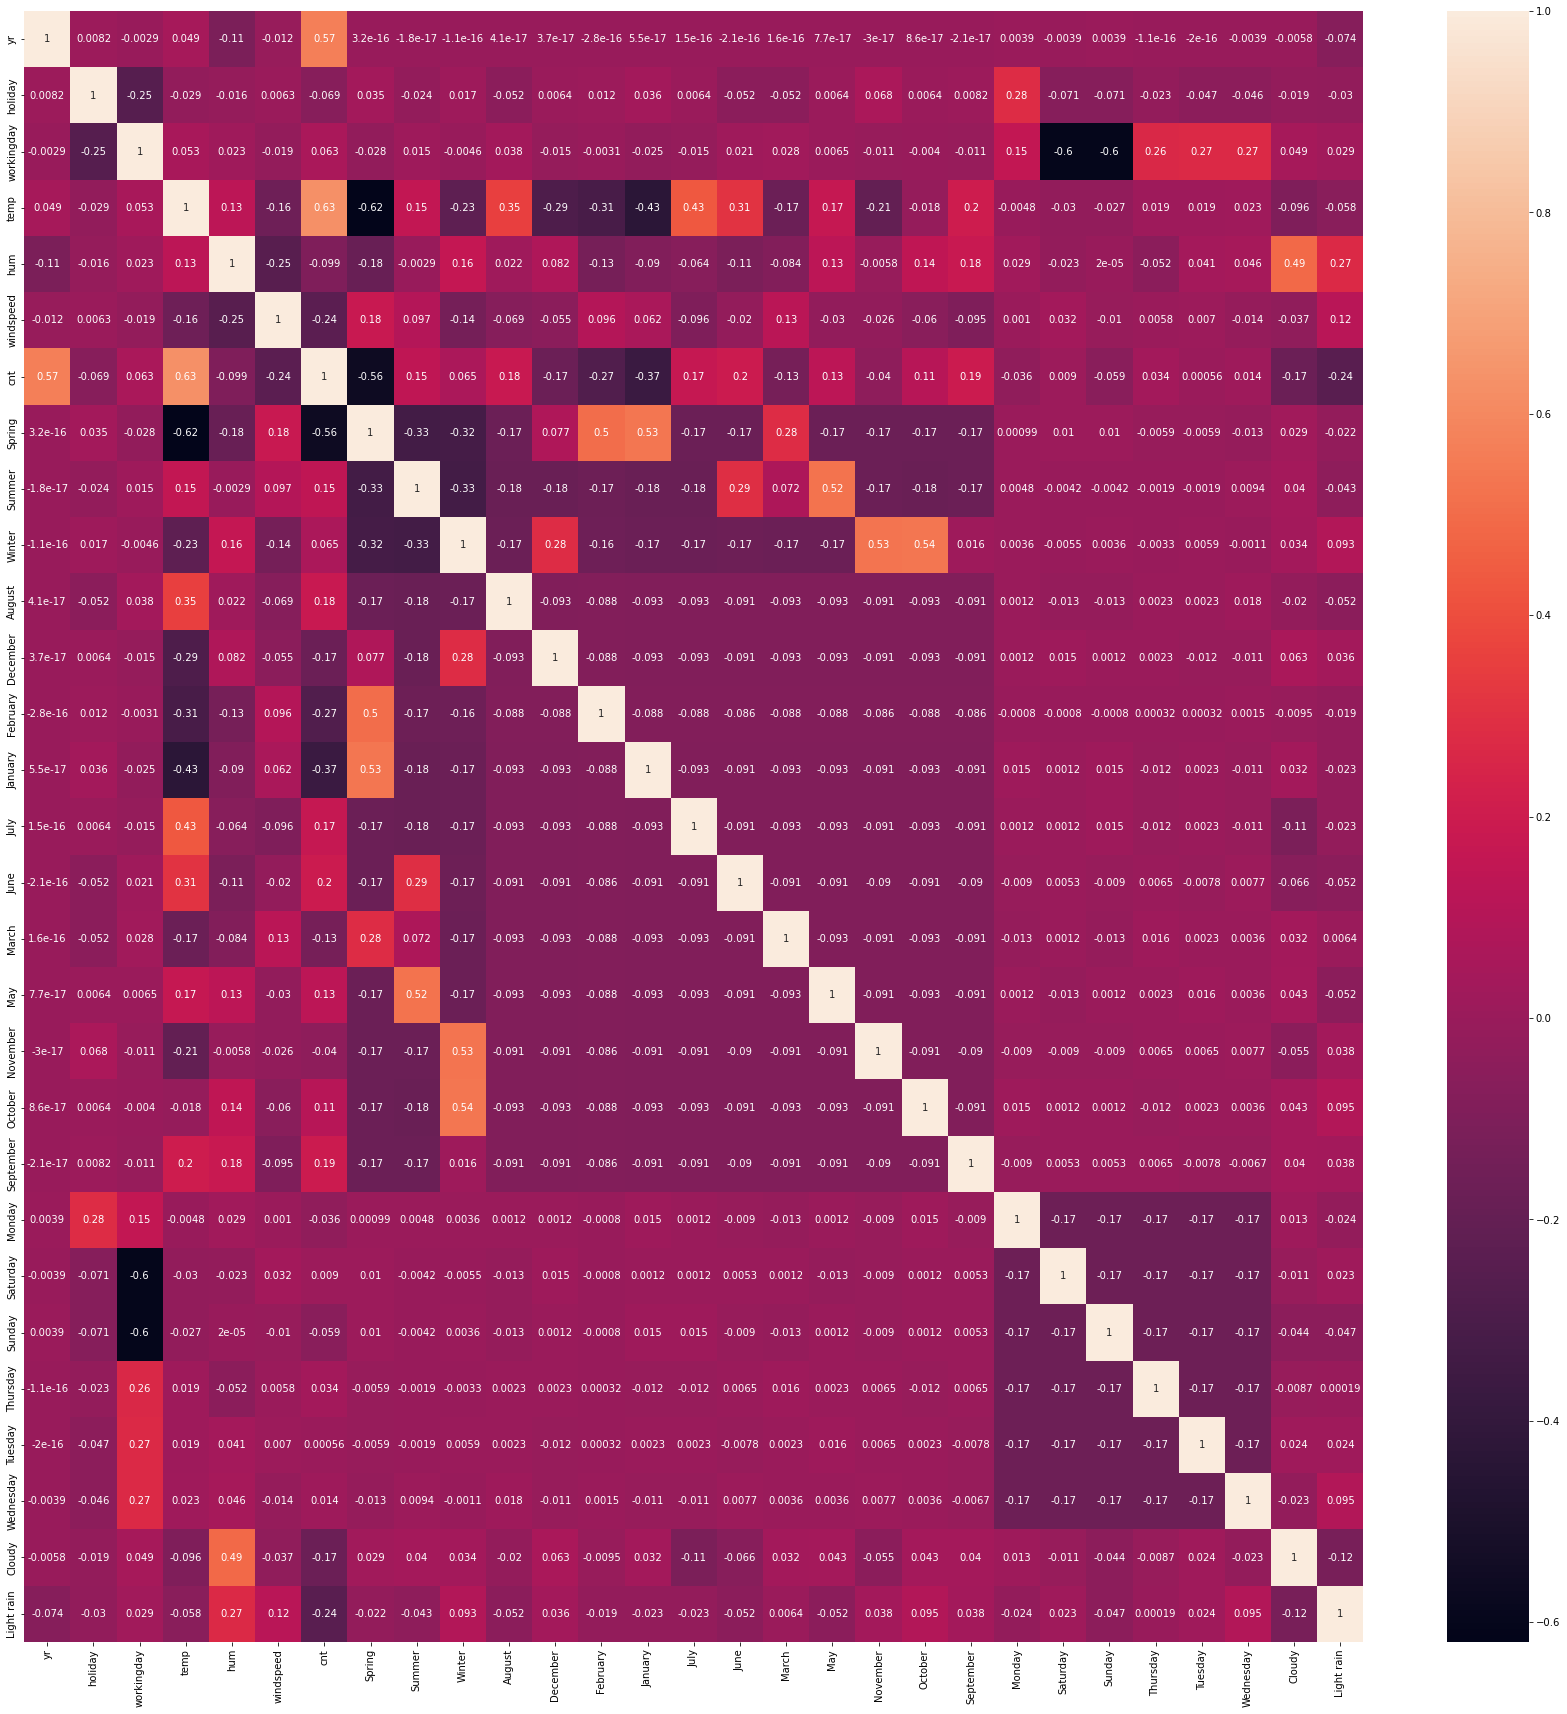

In [42]:
#heatmap to find the correlation
plt.figure(figsize = (30 , 30))
sns.heatmap(bikesharing.corr(), annot=True)
plt.show()

From the heat map we can see that the year and temp are highly correlated with the targeted variable cnt.

#### PREPARING THE DATA FOR MODELLING

In [33]:
#Creating Dummy Variables
season_dummyvar=pd.get_dummies(bikesharing['season'],drop_first=True)
season_dummyvar

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [34]:
month_dummyvar=pd.get_dummies(bikesharing['mnth'],drop_first=True)
month_dummyvar

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [35]:
weekday_dummyvar=pd.get_dummies(bikesharing['weekday'],drop_first=True)
weekday_dummyvar

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [36]:
weathersit_dummyvar=pd.get_dummies(bikesharing['weathersit'],drop_first=True)
weathersit_dummyvar

,Cloudy,Light rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [37]:
#concating the dummy df with main df
bikesharing = pd.concat([bikesharing,season_dummyvar,month_dummyvar,weekday_dummyvar,weathersit_dummyvar],axis=1)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light rain
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,1,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [38]:
#Dropping the season , month , weekday and weathersit from the table as the data is extracted respectively
bikesharing.drop(['season','mnth','weekday','weathersit'],axis=1, inplace=True)
bikesharing

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   Spring      730 non-null    uint8  
 8   Summer      730 non-null    uint8  
 9   Winter      730 non-null    uint8  
 10  August      730 non-null    uint8  
 11  December    730 non-null    uint8  
 12  February    730 non-null    uint8  
 13  January     730 non-null    uint8  
 14  July        730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  March       730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  November    730 non-null    uint8  
 19  October     730 non-null    u

In [40]:
#splitting the data into train and test 
df_train ,df_test= train_test_split(bikesharing,train_size=0.7 ,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Applying the scaling on the train sets

In [41]:
#1. Instantiate an object 

scaler=MinMaxScaler()

#create a list of numeric variables

num_vars=['temp','hum','windspeed','cnt']

#2. Fit on data 

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light rain
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Dividing into X and Y sets for the model building

In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 6),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Cloudy', True, 1),
 ('Light rain', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Saturday',
       'Cloudy', 'Light rain'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Building 1st linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.22e-191
Time:                        12:41:41   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [54]:
# Checking for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.60
7,Spring,5.08
4,temp,3.89
9,Winter,3.59
8,Summer,2.65
5,hum,1.91
3,workingday,1.88
13,Saturday,1.78
10,January,1.57
14,Cloudy,1.57


In [55]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_rfe.drop(["Spring"], axis = 1)

In [56]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.98e-191
Time:                        12:42:17   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.030      6.739      0.0

In [57]:
# Checking for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.89
3,workingday,1.88
12,Saturday,1.78
13,Cloudy,1.56
9,January,1.55
8,Winter,1.53
10,July,1.43
7,Summer,1.41


In [58]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [59]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.53e-191
Time:                        12:45:23   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1907      0.030      6.447      0.0

In [60]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.65
3,temp,2.07
4,hum,1.89
2,workingday,1.65
11,Saturday,1.64
12,Cloudy,1.56
8,January,1.55
7,Winter,1.53
9,July,1.43
6,Summer,1.41


In [61]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop(["January"], axis = 1)

In [62]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.14e-191
Time:                        12:46:01   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.028      6.014      0.0

In [63]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
10,Saturday,1.64
3,temp,1.60
11,Cloudy,1.56
8,July,1.43
6,Summer,1.33
7,Winter,1.29
12,Light rain,1.24


In [64]:
# Dropping highly correlated variables and insignificant variables
X_train_new = X_train_new.drop(["July"], axis = 1)

In [65]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.10e-191
Time:                        12:46:39   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1705      0.029      5.960      0.0

In [66]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
9,Saturday,1.64
10,Cloudy,1.56
3,temp,1.27
7,Winter,1.25
11,Light rain,1.24
6,Summer,1.19
5,windspeed,1.18


### Residual Analysis

In [68]:
y_train_pred = lr_5.predict(X_train_lm_5 )

Text(0.5, 0, 'Errors')

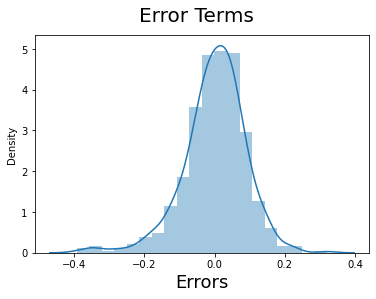

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

The errors are centered around the zero's.

### Making Predictions

#### Applying the scaling on the test sets

In [71]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
#Selecting the variables that were part of final model.
X_test=X_test[X_train_new.columns[1:]]
# Adding constant variable to test dataframe
X_test_lm_5= sm.add_constant(X_test)
X_test_lm_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   yr          220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   hum         220 non-null    float64
 5   windspeed   220 non-null    float64
 6   Summer      220 non-null    uint8  
 7   Winter      220 non-null    uint8  
 8   September   220 non-null    uint8  
 9   Saturday    220 non-null    uint8  
 10  Cloudy      220 non-null    uint8  
 11  Light rain  220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [74]:
y_pred = lr_5.predict(X_test_lm_5)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

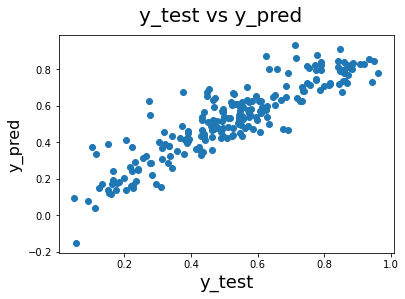

In [75]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

From the y_test and y_pred scatter graph it is evident it is follows Linearity.

#### R-squared score of the test set

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8065788803408082

The r^2 value is 0.8065788803408082

### The equation of our best fitted line is:

cnt=0.1705+(0.2294×yr)+(0.0533×workingday)+(0.571×temp)−(0.1629×hum)-(0.1864×windspeed)+(0.091×Summer)+(0.1396×Winter)+(0.1027×September)+(0.0628×Saturday)-(0.0538×Cloudy)-(0.2426×Light rain)